Grayscale Filter
Image 1 (input_1.jpg) - Serial Processing Time: 74.858425s
Image 1 (input_1.jpg) - Parallel Processing Time: 1.335961s
Results are the same


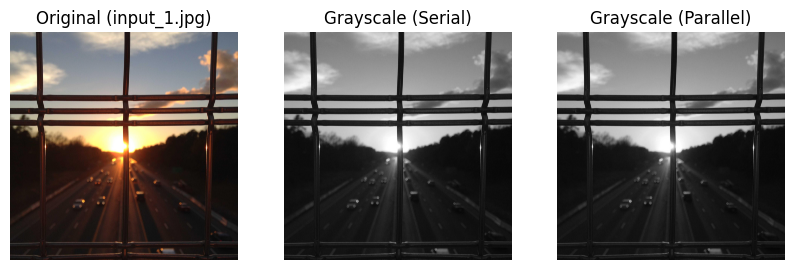

Image 2 (input_2.jpg) - Serial Processing Time: 73.583473s
Image 2 (input_2.jpg) - Parallel Processing Time: 0.010648s
Results are the same


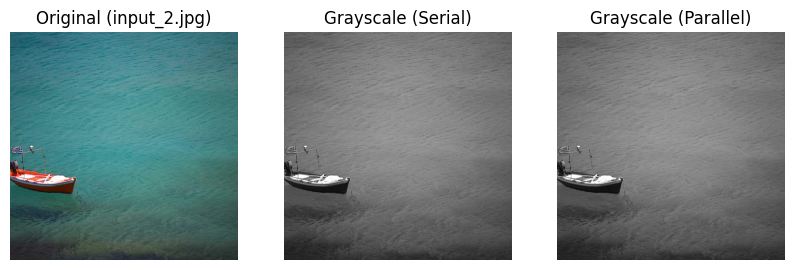

In [1]:
"""
Grayscale Filter
----------------
Este código demuestra el procesamiento de imágenes en paralelo aplicando la conversión a escala de grises píxel a píxel.
Imágenes extraídas de: https://picsum.photos/

> https://es.wikipedia.org/wiki/Procesamiento_digital_de_im%C3%A1genes 
"""

from numba import njit, prange
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import time


def load_images(directory="../assets/"):
    images = []
    filenames = sorted(
        [f for f in os.listdir(directory) if f.endswith((".png", ".jpg", ".jpeg"))]
    )
    for filename in filenames:
        image = cv2.imread(os.path.join(directory, filename))
        if image is not None:
            images.append(image)
    return images, filenames


def rgb_to_gray_serial(image: np.ndarray) -> np.ndarray:
    height, width, _ = image.shape
    gray_image = np.zeros((height, width), dtype=np.uint8)
    for i in range(height):
        for j in range(width):
            r, g, b = image[i, j]
            gray_image[i, j] = int(0.2989 * r + 0.5870 * g + 0.1140 * b)
    return gray_image


@njit(parallel=True)
def rgb_to_gray_parallel(image: np.ndarray) -> np.ndarray:
    height, width, _ = image.shape
    gray_image = np.zeros((height, width), dtype=np.uint8)
    for i in prange(height):
        for j in range(width):
            r, g, b = image[i, j]
            gray_image[i, j] = int(0.2989 * r + 0.5870 * g + 0.1140 * b)
    return gray_image


def display_images(original, gray_serial, gray_parallel, filename):
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title(f"Original ({filename})")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(gray_serial, cmap="gray")
    plt.title("Grayscale (Serial)")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(gray_parallel, cmap="gray")
    plt.title("Grayscale (Parallel)")
    plt.axis("off")

    plt.show()


print("Grayscale Filter")

images, filenames = load_images()

for idx, (image, filename) in enumerate(zip(images, filenames)):
    serial_start = time.perf_counter()
    gray_serial = rgb_to_gray_serial(image)
    serial_end = time.perf_counter()
    print(
        f"Image {idx + 1} ({filename}) - Serial Processing Time: {serial_end - serial_start:.6f}s"
    )

    parallel_start = time.perf_counter()
    gray_parallel = rgb_to_gray_parallel(image)
    parallel_end = time.perf_counter()
    print(
        f"Image {idx + 1} ({filename}) - Parallel Processing Time: {parallel_end - parallel_start:.6f}s"
    )

    assert np.array_equal(gray_serial, gray_parallel), "Results are not the same"
    print("Results are the same")

    display_images(image, gray_serial, gray_parallel, filename)